# **Домашнее задание**

### Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого:

+ Объедините 2 массива в DataFrame.
+ Обоснуйте выбор теста на корреляцию.
+ Сделайте вывод по гипотезе.

### Также ответьте на вопрос:

+ Какова разница в среднем размере мидии в зависимости от города-производителя.
+ Обоснуйте выбор теста.
+ Сделайте вывод по гипотезе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

# 1. Объединим 2 массива в DataFrame:

In [2]:
# исходные данные:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

# формируем DataFrame:
oysters = pd.DataFrame({
    'Petersburg': pd.Series(petersburg),
    'Magadan': pd.Series(magadan)})

display(oysters)

,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


### Так как длина списка *petersburg* меньше *magadan*, в DataFrame мы получили значение Nan. Заменим его на среднее-арифметическое.

In [3]:
oysters['Petersburg'].fillna(oysters['Petersburg'].mean(), inplace=True)

display(oysters)

,Petersburg,Magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


# 2. Обоснуем выбор теста на корреляцию:

Проведем исследование в несколько этапов:
+ визуально оценим нормальность данных используя метод с графиками нормальных квантилей (q-q plot);
+ выберем и проведем тест на нормальность;
+ основываясь на характере данных и показателях нормальности распределения выберем тест на корреляцию:

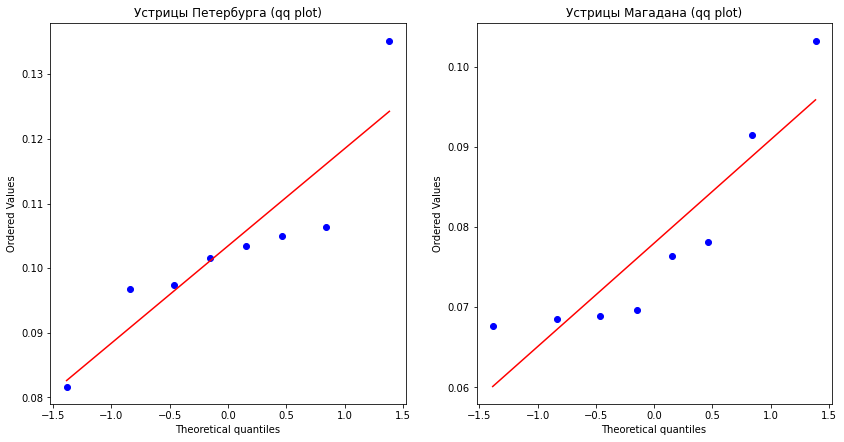

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

stats.probplot(oysters['Petersburg'], plot=ax[0])
ax[0].set_title('Устрицы Петербурга (qq plot)')

stats.probplot(oysters['Magadan'], plot=ax[1])
ax[1].set_title('Устрицы Магадана (qq plot)')

plt.show()

### На графиках хорошо видно, что значения отклоняются от прямой нормального распределения. Но все же значения на графике слева ближе к нормальному, а на графике справа - коэффициент нормальности будет ниже.

In [5]:
# формулируем гипотезы и устанавливаем уровень значимости:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

### Учитывай небольшой размер выборок, наиболее лучшим инструментом для определения нормальности будет тест Шапиро-Уилка:

In [6]:
_, p = stats.shapiro(oysters['Petersburg'])
print('Для устриц из Петербурга: p=%.3f' % p)
print(H0) if p > alpha else print(Ha)

_, p = stats.shapiro(oysters['Magadan'])
print('\nДля устриц из Магадана: p=%.3f' % p)
print(H0) if p > alpha else print(Ha)

Для устриц из Петербурга: p=0.123
Данные распределены нормально

Для устриц из Магадана: p=0.036
Данные не распределены нормально (мы отвергаем H0)


### Для проведения теста на корреляцию можно использовать параметрические и непараметрические методы. Непараметрические считаются менее мощными по сравнению с параметрическими. В то же время непараметрические методы более надежны в случаях, когда есть сомнения в том, что анализируемый признак имеет нормальное распределение.

### Спорная ситуация с данными:

- с одной стороны, мы имеем дело с непрерывными, а не категориальными данными, одно из распределений имеет черты нормальности;
- с другой стороны, одна из выборок не распределена нормально;

### Поэтому проведем два теста на корреляцию - Пирсона и Спирмена, и сравним результат.

Корреляция размеров устриц из разных городов, как влияние одной из выборок на другую - не имеет смысла. Однако все же можно попробовать осмысленно интерпретировать полученный результат. Предположим, что есть некий фактор, оказывающий одинаковое влияние на распределение размера устриц независимо от региона. Тогда данные будут иметь сильную корреляцию.

In [7]:
# исходя из идеи выше, примем нулевую и альтернативную гипотезы:
H0 = 'Данные не коррелируют между собой. Общий фактор влияния отсутствует.'
Ha = 'Данные коррелируют между собой. Общий внешний фактор существует.(мы отвергаем H0)'

In [8]:
# рассчитаем коэффициент корреляции и вероятность отсутствия связи по Пирсону:
corr_pirson, p_p = stats.pearsonr(oysters['Petersburg'], oysters['Magadan'])

# так как в функции scipy.stats.pearsonr  p это двухсторонняя p-величина, то при проверке H0 необходимо alpha/2
print('Коэффициент корреляции Пирсона: %.3f' % corr_pirson)
print('Вероятность отсутствия связи: %.3f' % p_p)
print(H0) if p_p > alpha/2 else print(Ha)

Коэффициент корреляции Пирсона: 0.245
Вероятность отсутствия связи: 0.559
Данные не коррелируют между собой. Общий фактор влияния отсутствует.


In [9]:
# рассчитаем коэффициент корреляции и вероятность отсутствия связи по Спирмену:
corr_spearman, p_s = stats.spearmanr(oysters['Petersburg'], oysters['Magadan'])

print('\nКоэффициент корреляции Спирмена: %.3f' % corr_spearman)
print('Вероятность отсутствия связи: %.3f' % p_s)
print(H0) if p_s > alpha else print(Ha)


Коэффициент корреляции Спирмена: 0.167
Вероятность отсутствия связи: 0.693
Данные не коррелируют между собой. Общий фактор влияния отсутствует.


# 3. Сделаем вывод по гипотезе:

Очевидно, что данные никак не связаны между собой. Предположение о влиянии одного параметра на другой не имеет смысла.

Также отвергнута гипотеза о существовании некого внешнего фактора, который мог бы оказывать схожее влияние на данные совокупности, о чем бы свидетельствовало наличие корреляционной связи данных выборок.

И корреляционный тест Пирсона и тест Спирмена показывают низкие коэффициенты корреляции данных и высокие вероятности отсутствия связи.

### Данные выборки значимо не коррелируют друг с другом и имеют разную логику распределения данных.

# 4. Какова разница в среднем размере мидии в зависимости от города-производителя?

In [10]:
# рассчитаем средние размеры мидий по двум городам:
oysters_petersburg_mean = round(oysters['Petersburg'].mean(), 3)
print(f'Средний размер мидий из Петербурга - {oysters_petersburg_mean}')

oysters_magadan_mean = round(oysters['Magadan'].mean(), 3)
print(f'Средний размер мидий из Магадана - {oysters_magadan_mean}')

oysters_diff = abs(round(oysters_petersburg_mean - oysters_magadan_mean, 3))
print(f'\nРазница размеров составляет - {oysters_diff} ед.')

Средний размер мидий из Петербурга - 0.103
Средний размер мидий из Магадана - 0.078

Разница размеров составляет - 0.025 ед.


### Разница среднего размера мидий равна 0.025. Можно сказать, что мидии из Магадана в среднем почти на четверть меньше мидий из Петербурга.

# 5. Обоснуем выбор теста и проведем тест на сравнение выборок:

### Необходим тест на сравнение двух выборок. Независимой категориальной переменной будет выступать город-производитель устриц. Зависимой количественной переменной - размер устриц.

### Для этих целей подходит независимый t-тест (так как сравнивается ровно две группы).

T-критерий описывается как статистический критерий, который проверяет, сильно ли отличаются значения совокупности двух выборок, используя t-распределение, которое используется, когда стандартное отклонение неизвестно, а размер выборки невелик. Это инструмент для анализа, взяты ли две выборки из одной популяции.

In [11]:
# сформулируем гипотезы:
H0 = 'Нет значимой разницы между размерами устриц в разных городах.'
Ha = 'Есть значимая разница между размерами устриц в разных городах.'

# проведем t-тест и рассчитаем значение p-value:
test_results = stats.ttest_ind(oysters['Petersburg'], oysters['Magadan'], equal_var=True)
p = round(test_results[1],3)

print(f'Вероятность отсутствия значимой разницы средних параметров в выборках составляет - {p}\n')
print('Принимаем нулевую гипотезу: ', H0) if p > alpha else print('Принимаем альтернативную гипотезу: ', Ha)

Вероятность отсутствия значимой разницы средних параметров в выборках составляет - 0.003

Принимаем альтернативную гипотезу:  Есть значимая разница между размерами устриц в разных городах.


# 6. Сделаем вывод по гипотезе:

### Значимая разница между размерами устриц из разных городов подтверждается результатами t-теста, также как и простым сравнением средних показателей по двум выборкам.